## Module 4: *(Template)*

## Team Members:
Shreesh Kalagi & Max

## Project Title:
Developing an SIR model of the COVID outbreak in China 2022


## Project Goal:
This project seeks to develop an SIR model of the China 2022 COVID outbreak.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    * COVID-19 emerged in Wuhan, China, in December of 2019. The virus spread rapidly within China and then worldwide through sustained human-to-human transmission, leading the WHO to declare a pandemic in March 2020. By 10 November 2024 more than 776 million confirmed cases and over 7 million confirmed deaths had been reported to WHO globally, though true infections are believed to be higher because of under-ascertainment, and COVID-19 has shifted from acute pandemic waves to an endemic pattern with lower but persistent incidence. China initially kept incidence relatively low through “zero-COVID” controls, but after these measures were lifted in 2022, the country experienced massive Omicron waves from roughly November 2022 through mid-2023, with modeling studies suggesting very rapid nationwide spread and analyses of excess mortality estimating on the order of 1–2 million additional deaths in just the first two months after the policy change.
* Economic burden
    * COVID had a significant economic burden on the global scale. As sickness and quarantine inhibited the productivity of nearly every organization, the global market plummeted and a recession ensued. Specifically in China, several "Zero-COVID" policies, including transportation and public space support. As a result of the pandemic in China in the year 2022, the country lost 4% of its GDP. Loss of productivity due to a detrimented workforce in China caused a national recession in China. The cost of living increased drastically, placing a financial burden on Chinese citizens.

* Risk factors (genetic, lifestyle) & Societal determinants
    * The primary risk factor associated with COVID was direct contact with infected individuals. Thus, those prone to frequent human contact, including those who worked at customer-facing businesses and employees of the state (law enforcement, fire and rescue), were at high risk. Other risk factors include being immunocompromised (conditions including cancers, heart and lung diseases, obesity) and those of older ages. Vaccination, including primary and booster doses, helps to reduce risk of infection of COVID.

* Symptoms
    * Symptoms of COVID often mimic those of the common cold: Fever, chills, SOB, sore throat, congestion, loss of sense of taste or smell, fatigue, myalgia, headache, and vertigo (CDC). Symptoms are often more severe for those who are immunocompromised and those of older age. Some individuals may not experience any symptoms but still are a "carrier" of the disease.

* Diagnosis
    * There are two main forms of diagnosis for COVID. One accurate method of diagnosis is PCR tests, which look at genetic material from human samples in order to identify presence of the disease. PCR tests are frequently completed by healthcare professionals in laboratories. Another form of diagnosis is antigen testing, also known as "rapid" testing. These tests detect presence of antigens in a sample. They are much faster than PCR tests (and so are often done at home), but their results are much less reliable. The FDA recommends that if one attains a positive antigen test result that they wait two days and then repeat testing to confirm results.
     
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * SARS-CoV-2, the virus that causes COVID-19, binds to the ACE2 receptor, which is expressed on epithelial cells in the nasal passages, lungs, gut, heart, kidneys, and several other tissues. After attachment, the virus enters cells and triggers cytopathic effects and an immune response. In the respiratory tract, infection of type II alveolar cells disrupts surfactant production and impairs gas exchange, contributing to hypoxemia. The innate immune system responds with interferons and inflammatory cytokines, and in severe cases, dysregulation of this response leads to exaggerated inflammation, vascular leakage, microthrombosis, and multiorgan involvement. This response explains complications such as pulmonary embolisms, myocarditis, and kidney injury.
Sources:

https://www.sciencedirect.com/science/article/pii/S1043951X23001864

https://www.cdc.gov/covid/risk-factors/index.html

https://www.cdc.gov/covid/signs-symptoms/index.html

https://www.mayoclinic.org/diseases-conditions/coronavirus/diagnosis-treatment/drc-20479976

https://pmc.ncbi.nlm.nih.gov/articles/PMC7153464

https://www.nature.com/articles/s41467-023-39638-4

https://www.nature.com/articles/s41579-022-00713-0

## Dataset: 

The dataset consists of a two-column table containing dates and confirmed case counts for COVID in China in the spring of 2022. These data originate from online case-tracking databases, then standardized. Case counts are reported daily. All values are measured as counts of confirmed cases, which serve as a proxy for observed infections.

         date  confirmed_cases
0  2022-02-22           189565
1  2022-02-23           198478
2  2022-02-24           207599
3  2022-02-25           217932
4  2022-02-26           292792


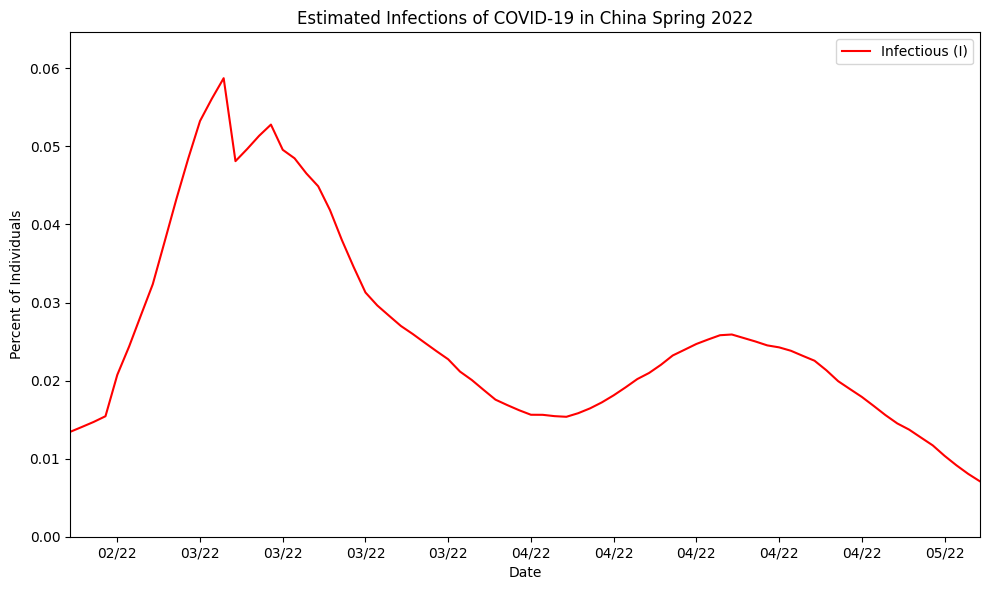

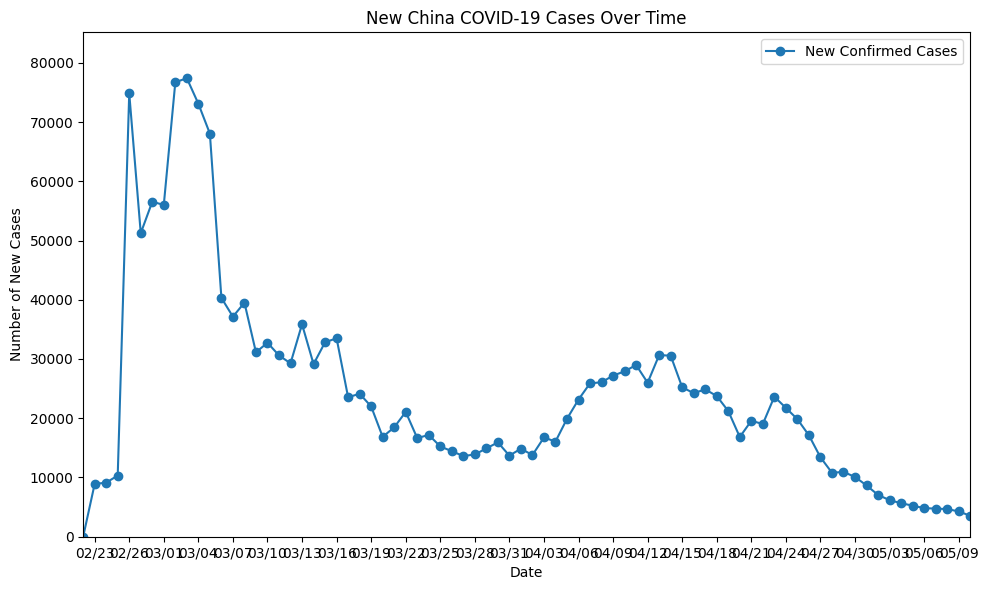

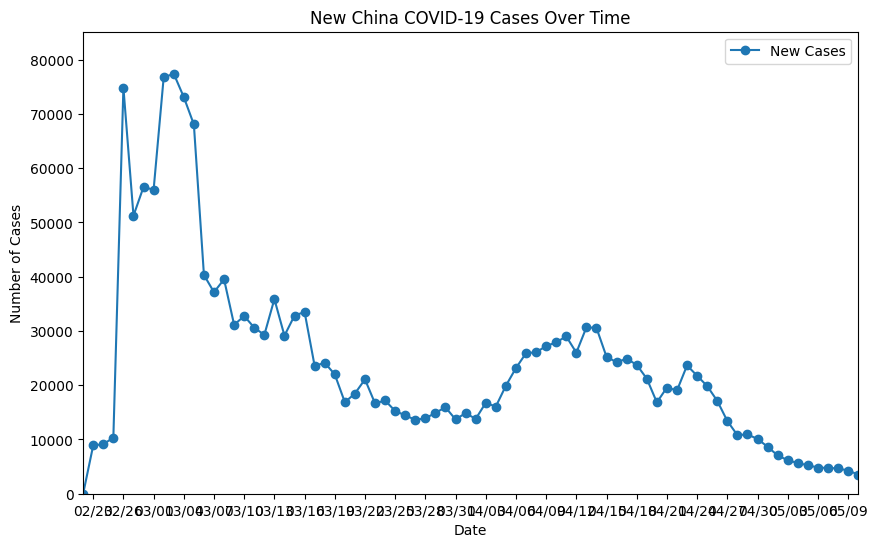

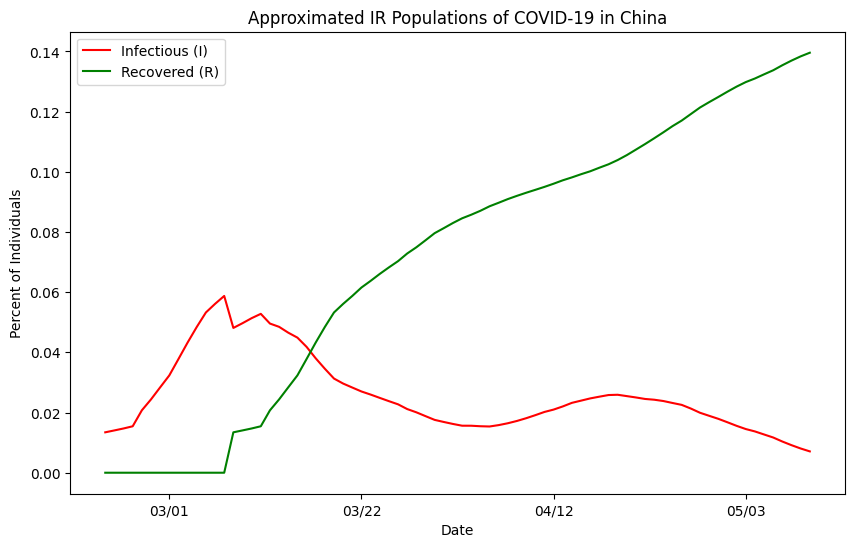

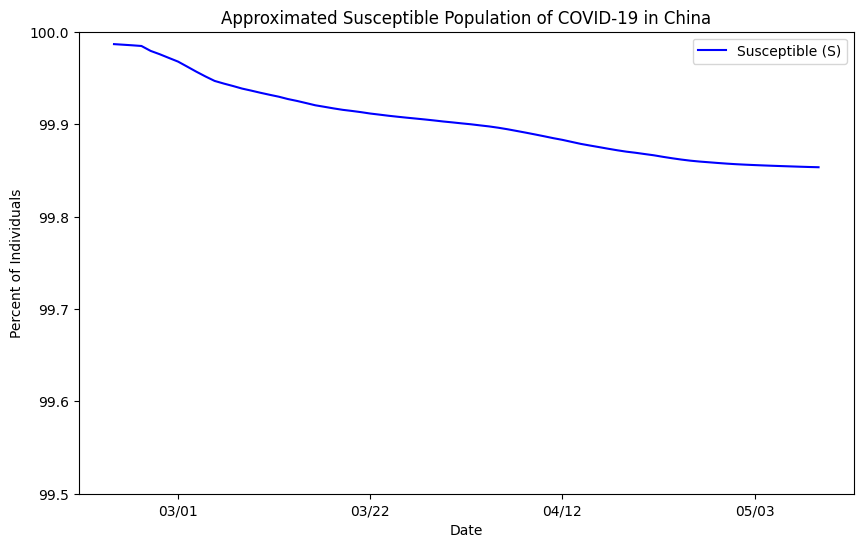

In [20]:
## LOAD YOUR DATASET HERE.
from main_functions import convert_cumulative_to_SIR
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Read in the csv file of cumulative cases.
data = pd.read_csv("./data/covid_china_data_spring_2022_cumulative.csv")
# Display the first few rows of the dataset
print(data.head())

# Ensure date column is in datetime format
data["date"] = pd.to_datetime(data["date"])

# preprocess:
# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.
# new cases each day does not represent the number of currently infectious individuals I(t)
# Let's use the convert_cumulative_to_SIR function to approximate S(t), I(t), and R(t) from the data
population = 1411778724  # China population approx as of 2022
data_sir = convert_cumulative_to_SIR(
    data,
    date_col="date",
    cumulative_col="confirmed_cases",
    population=population,
    infectious_period=14,
    new_case_col="new_cases",
    I_col="I_est",
    R_col="R_est",
    S_col="S_est",
)

# Ensure date column in data_sir is in datetime format
data_sir["date"] = pd.to_datetime(data_sir["date"])

# 3. Plot S, I, R over time.

plt.figure(figsize=(10, 6))

# convert I_est to percent of population to match the axis label
I_pct = data_sir["I_est"] / population * 100.0
plt.plot(data_sir["date"], I_pct, label="Infectious (I)", color="red")

plt.xlabel("Date")
plt.xlim(pd.Timestamp("2022-02-22"), pd.Timestamp("2022-05-10"))

# dynamic y-limits so the curve isn’t squashed or clipped
plt.ylim(0, I_pct.max() * 1.1)

# use a portable date format string and a reasonable locator
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))

plt.ylabel("Percent of Individuals")
plt.title("Estimated Infections of COVID-19 in China Spring 2022")
plt.legend()
plt.tight_layout()
plt.show()

# Let's look at new infections (incidence) over time: I(t)

# notice that we are taking the difference between days to get new cases
data["new_cases"] = data["confirmed_cases"].diff().fillna(0)

plt.figure(figsize=(10, 6))
plt.plot(data["date"], data["new_cases"], label="New Confirmed Cases", marker="o")
plt.xlabel("Date")

# dynamic y-limits so we see the full range of new cases
plt.ylim(0, data["new_cases"].max() * 1.1)

plt.xlim(pd.Timestamp("2022-02-22"), pd.Timestamp("2022-05-10"))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.ylabel("Number of New Cases")
plt.title("New China COVID-19 Cases Over Time")
plt.legend()
plt.tight_layout()
plt.show()

# here
plt.figure(figsize=(10, 6))
plt.plot(data["date"], data["new_cases"], label="New Cases", marker="o")
plt.xlabel("Date")
plt.ylim(0, data["new_cases"].max() * 1.1)
plt.xlim(pd.Timestamp("2022-02-22"), pd.Timestamp("2022-05-10"))

# Format ticks as M/Y (no leading zeros)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=3))

plt.ylabel("Number of Cases")
plt.title("New China COVID-19 Cases Over Time")
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))

S_pct = data_sir["S_est"] / population * 100.0
I_pct = data_sir["I_est"] / population * 100.0
R_pct = data_sir["R_est"] / population * 100.0

# Plot only I and R so they are visible on the same scale
plt.plot(data_sir["date"], I_pct, label="Infectious (I)", color="red")
plt.plot(data_sir["date"], R_pct, label="Recovered (R)", color="green")

plt.xlabel("Date")
# plt.ylim(0, 8e9)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
plt.ylabel("Percent of Individuals")
plt.title("Approximated IR Populations of COVID-19 in China")
plt.legend()
plt.show()

# SEPARATELY PLOTTED: S, the susceptible population, is very close to 100% throughout the time period

plt.figure(figsize=(10, 6))
plt.plot(data_sir["date"], S_pct, label="Susceptible (S)", color="blue")
plt.xlabel("Date")
plt.ylim(99.5, 100)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%m/%d"))
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=3))
plt.ylabel("Percent of Individuals")
plt.title("Approximated Susceptible Population of COVID-19 in China")
plt.legend()
plt.show()

## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [ ]:
## PYTHON CODE TO BUILD AND FIT AN SIR MODEL GOES HERE. INTERSPERSE COMMENTS (IN MARKDOWN) TO EXPLAIN EACH STEP.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*